# Procesamiento de datos
Fecha: 16 Marzo 2022<br>
Clase: 4

## Indice
1. Pandas <br>
1.1. Operaciones entre columnas<br>

2. Probabilidad<br>


Antes de empezar, importamos los paquetes que vamos a utilizar:

In [2]:
import pandas as pd
import numpy as np

# 1.1 Operaciones entre columnas con Pandas


Como comentamos el primer día, un DataFrame es una estructura de datos bidimensional similar a lo que nos encontraríamos en SQL. Tiene un conjunto de columnas, cada una definiendo una variable o atributo, y un conjunto de filas, cada una definiendo una instancia o registro. 

Podemos filtrar datos, calcular estadísticas de las variables, multiplicarlo por otros objetos como numpy arrays (cuando la operación de multiplicación tenga sentido). Creamos un dataframe de ejemplo:

In [3]:
# dataframe 1
df1 = pd.DataFrame([
    ['1','Estudio', 2, 39, 60000],
    ['2','Apartamento', 2, 65, 130000],
    ['3','Estudio', 2, 41, 55000],
    ['4','Casa de campo', 3, 120, 170000],
    ['5','Estudio', 1, 35, 52000],
    ['5','Apartamento', 2, 70, 185000],
    ['7','Apartamento', 3, 83, 220000],
    ['8','Apartamento', 4, 90, 250000],
    ['9','Casa de campo', 5, 122, 139000], 
    ['10','Estudio', 1, 25, 35000],
    ['11','Estudio', 1, 27, 40000],
    ['12', 'Nave industrial', 1, 150, 90000],
    ['13','Casa de campo', 4, 95, 135000], 
    ['14', 'Nave industrial', 1, 130,85000],
    ['15','Estudio', 1, 25, 70000]],
    columns=['id', 'Inmueble', 'Habitaciones', 'Metros cuadrados', 'Precio'])


df1.head()

,id,Inmueble,Habitaciones,Metros cuadrados,Precio
0,1,Estudio,2,39,60000
1,2,Apartamento,2,65,130000
2,3,Estudio,2,41,55000
3,4,Casa de campo,3,120,170000
4,5,Estudio,1,35,52000


In [4]:
type(df1)

pandas.core.frame.DataFrame

Una Serie de Pandas es una estructura de datos unidimensional. No se parece a lo que nos encontraríamos en SQL, sino más bien a un numpy array o a un diccionario de Python. En esta estructura de datos hay registros, y cada uno tiene asignado su nombre, pero no hay columnas. Se sobreentiende que toda la información pertenece a un atributo concreto. Podemos asignar nombres a las Series de Pandas. Por ejemplo:


In [5]:
s = df1['Precio']
s

0      60000
1     130000
2      55000
3     170000
4      52000
5     185000
6     220000
7     250000
8     139000
9      35000
10     40000
11     90000
12    135000
13     85000
14     70000
Name: Precio, dtype: int64

In [6]:
type(s)

pandas.core.series.Series

Tener una sola columna no hace que la estructura de datos sea unidimensional, podemos definir un DataFrame que tenga una única columna. 
Esta columna tendrá las mismas características que las de un DataFrame con múltiples columnas.

In [7]:
dfs = df1[['Precio']]
dfs.head()

,Precio
0,60000
1,130000
2,55000
3,170000
4,52000


In [8]:
type(dfs)

pandas.core.frame.DataFrame

Una propiedad importante de los DataFrames y las Series de Pandas es que, alrealizar operaciones entre ellos, **Pandas tiene en cuenta los nombres de los registros o variables, para no mezclar operaciones entre objetos con distintos nombres**. Imaginemos que en un dataset de precios de viviendas queremos obtener, por zona de la ciudad, el precio medio dividido por el número medio de habitaciones, para saber qué zona tiene las habitaciones más caras (en promedio). Podemos empezar creando una Serie de Pandas con el método groupby() que nos diga el número promedio de habitaciones por zona.

In [9]:
m2 = df1.groupby(by = 'Inmueble').mean()['Metros cuadrados']
m2

Inmueble
Apartamento         77.000000
Casa de campo      112.333333
Estudio             32.000000
Nave industrial    140.000000
Name: Metros cuadrados, dtype: float64

Ahora podemos hacer lo mismo para el precio de la vivienda, calculando el precio
promedio por zona, utilizando el método groupby()

In [10]:
p = df1.groupby(by = 'Inmueble').mean()['Precio']
p

Inmueble
Apartamento        196250.0
Casa de campo      148000.0
Estudio             52000.0
Nave industrial     87500.0
Name: Precio, dtype: float64

Para obtener el precio promedio entre el número promedio de habitaciones,
basta con dividir ambas Series de Pandas, incluso aunque los nombres de las
regiones estén desordenados
Pandas encajará cada zona de una serie con cada zona de la otra Serie de
forma automática

In [11]:
(p / m2).sort_values(ascending = False)

Inmueble
Apartamento        2548.701299
Estudio            1625.000000
Casa de campo      1317.507418
Nave industrial     625.000000
dtype: float64

# Distribuciones de probabilidad

La distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable la probabilidad de que dicho suceso ocurra. 
Una distribución de probabilidad puede verse como una lista que nos proporciona todos los resultados de los valores que pueden presentarse en un acontecimiento, junto con la probabilidad de ocurrencia asociada a cada uno de estos valores.

Dicho de otra forma, **la distribución de probabilidad nos dice como se distribuyen los valores de un conjunto de datos**. Si conocemos como se distribuyen los valores de nuestro conjunto de datos, podemos intentar aproximarlo a una distribución teorica, cuyas propiedades y características son conocidas. Así, podremos realizar muchos cálculos en los datos reales utilizando hipótesis extraidas de la distribución teórica.

Aunque hay muchas distribuciones diferentes, en la practica se usan mas un pequeno número de ellas. Esto se debe a que tienen unas características matemáticas que las hace fáciles de usar, por que se asemejan bien a los datos que queremos entender, o por ambas razones. Las distribuciones estan divididas dependiendo si se usan para variables discretas o continuas. De momento, nosotros nos centraremos en la distribución normal.


## Distribución normal

La distribución normal, tambien conocida como distribución Gaussiana, es una de las principales distribuciones, dada su repetida aparaición modelando fenómenos naturales. Asumir que la distribución de un conjunto de datos es gaussiana, es una suposición típica antes de usar muchos algoritmos en Ciencia de datos.

Esta distribución tiene una forma acampanada y simétrica, centrada en la media $\hat x$, cuya dispersión viene determinada por la desviación standard $\sigma$. Esto es una forma de decir que los datos cerca de la media apareceran de forma mas frecuente que los alejados. La función de distribución de probabilidad viene dada por:

<h1><center> $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \hat x)^2}{2\sigma^2}}$ </center></h1>



## visualizacion de distribuciones

Aunque los indicadores de la estadística descriptiva dan una información muy práctica, no nos dan una imagen clara de los datos con los que estamos trabajando. Por eso es importante complementarlos con la gráfica de su distribución, donde podamos ver con que frecuencia aparece cada valor. 

La representación mas común de la distribución de un set de datos es un histograma. El histograma muestra las frecuencias como un gráfico de barras que indica como de frecuentemente ocurre un determinado valor en el conjunto de datos. El eje horizontal representa los valores del conjunto de datos y el eje vertical representa la frecuencia con que esos valores ocurren.

Para visualizar datos en Python usaremos el paquete matplotlib.


In [12]:
# Importamos matplotlib 
import matplotlib.pyplot as plt

Para generar un conjunto de datos con una distribución normal, podemos utilizar numpy:

In [13]:
# Generamos el conjunto de datos
mu, sigma = 5, 2 # media y desviación estandar
datos = np.random.normal(mu, sigma, 10000) #creando muestra de datos


Ahora podemos comprobar la media y desviación típica:

In [14]:
mu - np.mean(datos)
# debería resultar algo cercano a cero

-0.0014894676636050264

In [15]:
sigma - np.std(datos)
# debería resultar algo cercano a cero

0.014278558576999556

Ahora podemos visualizar el histograma de la muestra:

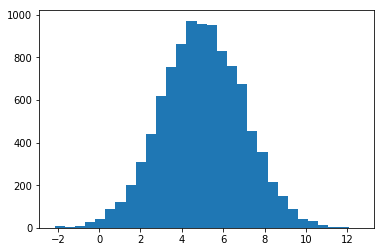

In [16]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 30) # el segundo input es el número de cajas.
plt.show()

Una opción básica de matplotlib es agregar el normbre de los ejes, y el título. Se puede hacer de la siguiente forma:

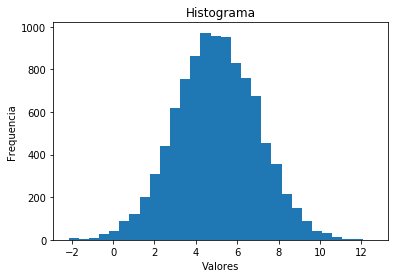

In [17]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 30) 
plt.ylabel('Frequencia') # Nombre del eje vertical
plt.xlabel('Valores') # Nombre del eje horizontal
plt.title('Histograma') # Título de la gráfica
plt.show()

plt.hist nos devuelve en primer lugar el número de valores que han sido agrupados en cada caja:

In [18]:
cuenta

array([  8.,   6.,   7.,  27.,  43.,  88., 123., 203., 307., 442., 619.,
       756., 863., 972., 958., 951., 830., 759., 674., 456., 358., 215.,
       151.,  87.,  42.,  30.,  15.,   5.,   4.,   1.])

Por tanto, si sumamos todos, obtendremos el número de muestras:

In [19]:
np.sum(cuenta)

10000.0

En segundo lugar, plt.hist nos devuelve los valores extremo de cada barra o caja:

In [20]:
cajas

array([-2.15731717, -1.66660825, -1.17589934, -0.68519042, -0.1944815 ,
        0.29622742,  0.78693634,  1.27764525,  1.76835417,  2.25906309,
        2.74977201,  3.24048092,  3.73118984,  4.22189876,  4.71260768,
        5.20331659,  5.69402551,  6.18473443,  6.67544335,  7.16615226,
        7.65686118,  8.1475701 ,  8.63827902,  9.12898794,  9.61969685,
       10.11040577, 10.60111469, 11.09182361, 11.58253252, 12.07324144,
       12.56395036])

### Función de densidad

La función de densidad de probabilidad, función de densidad, o simplemente densidad de una variable aleatoria continua **describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor**.

Es decir, **relaciona cada valor con su probabilidad en lugar de su frecuencia** como hemos visto arriba. Esta función esta normalizada, de manera que el valor total de probabilidad sea 1. Una de sus ventajas es que podemos comparar varias distribuciones, sin ser confundidos por la diferencia de tamano entre muestras. 

Aunque luego veremos como calcularla usando pandas, podemos aproximar la función de densidad de un set de datos usando la opción density true en plt.hist. 
Esto resulta en que cada barra o caja (bin) mostrara la cuenta asociada dividida por el total de número de cuentas y la anchura de la caja (density = counts / (sum(counts)(density * np.diff(bins))), de tal manera que el area debajo del histograma es igual a 1.

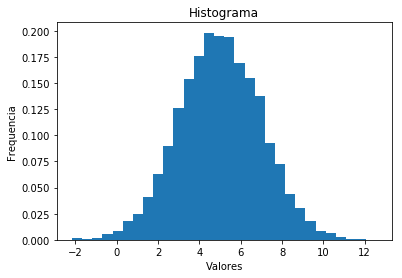

In [21]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 30, density = True)
plt.ylabel('Frequencia') # Nombre del eje vertical
plt.xlabel('Valores') # Nombre del eje horizontal
plt.title('Histograma') # Título de la gráfica
plt.show()

**Ejercicio** : Crea dos distribuciones normales: <br>
1) La distribución a, centrada en mu = 15, y con una desviación de 3. Tendrá 3000 muestras. <br>
2) La distribución b, centrada en mu = 22, y con una desviación de 0.5. Tendrá 500 muestras.<br>

Grafica: <br>

a) Ambas distribuciones en la misma gráfica, sin especificar el número de cajas. Anade la leyenda a cada curva. Como podemos hacer que las barras queden transparentes? (pista, usa histtype) <br>

b) En el apartado anterior, vemos que es dificil comparar ambas distribuciones. Normaliza los histogramas haciendo uso de density = True. <br>

c) Que ocurre si especificamos el número de cajas, como cambia? Como podríamos hacer que ambas distribuciones tuviesen el mismo tamano de bins? <br>

d) Ahora usa un tamano de cajas para las dos distribuciones y la opción density = True. 

In [1]:

# Apartado A


In [2]:
# Apartado B



In [3]:
# Apartado C



In [4]:
# Apartado D



Ahora que hemos representado graficamente nuestras distribuciones normales, podemos integrar graficamente lo que hemos averiguado sobre ellas gracias a la estadística descriptiva. Para ello, vamos a hacer uso del plot de linea.

#### Interludio: Plot de linea y de dispersion

Para visualizar lineas, podemos hacer uso del plot de linea. Matplotlib permite cambiar el color de las lineas, su estilo, etc. Podeis ojear su documentación aquí: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Alternativamente, podríamos hacer un plot de dispersión (de puntos), haciendo uso de plt.scatter(). Mas información aquí: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


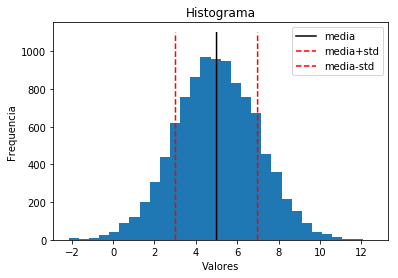

In [26]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 30) # el segundo input es el número de cajas.

# plot de la media
var_y = np.arange(0, 1100) 
var_x = np.ones(len(var_y)) * np.mean(datos)
plt.plot(var_x, var_y, label = 'media', color = 'black')

# Plot de la media + desviacion tipica
var_y = np.arange(0, 1100) 
var_x = np.mean(datos) + np.ones(len(var_y)) * np.std(datos)
plt.plot(var_x, var_y, label = 'media+std', color = 'red', linestyle = '--')
# Plot de la media - desviacion tipica
var_y = np.arange(0, 1100) 
var_x = np.mean(datos) - np.ones(len(var_y)) * np.std(datos)
plt.plot(var_x, var_y, label = 'media-std', color = 'red', linestyle = '--')

plt.ylabel('Frequencia') # Nombre del eje vertical
plt.xlabel('Valores') # Nombre del eje horizontal
plt.title('Histograma') # Título de la gráfica

plt.legend()

plt.show()

**Ejercicio**: Plotea la distribución junto con los cuartiles Q1, Q2 y Q3. Además del percentil 42.

**Ejercio: ** Tiene el valor de la media una probabilidad del 50%? Porque? 


### Función de Distribución Acumulada

Otra posibilidad para representar nuestras distribuciones es calcular la Función de distribución acumulada (FDA). Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.


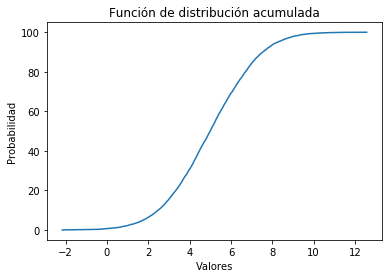

In [29]:
var_x = np.sort(datos)
var_y = np.arange(0, 100, 100 / len(datos))

plt.plot(var_x,var_y)

plt.ylabel('Probabilidad') # Nombre del eje vertical
plt.xlabel('Valores') # Nombre del eje horizontal
plt.title('Función de distribución acumulada') # Título de la gráfica
plt.show()


**Ejercicio**: Usa los datos generados en el ejercicio anterior para calcular su FDAs y plotealas juntas. No olvides poner la leyenda para sabel cual es cada curva.

Como hemos comentado, la FDA esta directamente relacionada con los cuartiles percentiles.

**Ejercicio**: Usa los datos generados en el ejercicio anterior para plotear su FDA junto con el percentil 42. 


### Diagramas de cajas

Otra posibilidad de visualización que describe varias características importantes al mismo tiempo, tales como las medidas de centralización, la dispersión o la simetría de una distribución es el diagrama de cajas. Este diagrama consiste en una caja rectangular cuyos extremos son el cuartil Q1 y Q3, con la media o mediana como una linea en el centro. A la caja le salen dos lineas (whiskers) que marcan el valor mínimo y máximo de nuestro conjunto de datos como Q1 - 1.5 IQR y Q3 + 1.5 IQR, respectivamente (aunque estos valores se pueden reajustar), dejando todo lo que esta fuera como valores atípicos o outliers.
    
    
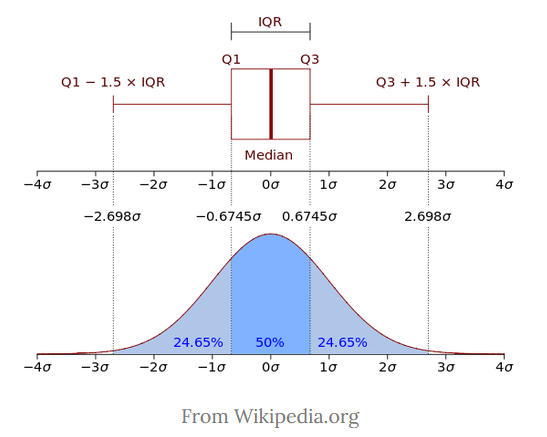

El diagrama de cajas, se puede visualizar haciendo uso de matplotlib. Mas info aquí: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

**Ejemplo:**

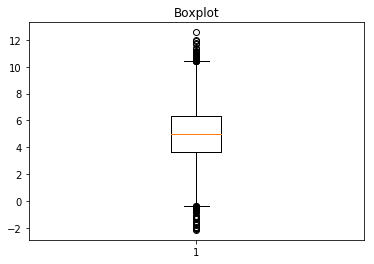

In [32]:
# Creamos un diagrama de caja
plt.boxplot(datos) 
plt.ylabel('Valores') # Nombre del eje vertical
plt.title('Boxplot') # Título de la gráfica

plt.show()

**Ejercicio:** Como podemos hacer que los outliers no aparezcan?<br>
a) Usa la opción showfliers.<br>
b) Cambia la longitud de los whiskers.<br>
Cual es la diferencia en cada método?

In [5]:
# A)

# B)


**Ejercicio:** Crea una lista con los arrays datos_a y datos_b que hemos creado anteriormente. Usa esa lista para crear un diagrama de cajas en el que podamos comparar ambas distribuciones. Nombra cada distribución (puedes renombrar los xticks o incluir un label en plt.boxplot. Puedes colorear las cajas?

Boxplot tiene varias opciones, puedes obtener mas información en este tutorial: https://machinelearningknowledge.ai/matplotlib-boxplot-tutorial-for-beginners/ o en su documentación: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

###  Distribuciones simetricas y asimetricas

Una forma de cuantificar si una distribución es simétrica es comprobar que su moda, mediana y media coinciden aproximadamente. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, la media coincide con la mediana, y también con la moda, ya que será el valor mas repetido.

Se dice que una distribución tiene asimetria a la derecha (positiva) si la cola a la derecha de la media es más larga que la de la izquierda. Esto quiere decir que los valores a la derecha estan mas separados de la media que los de la izquierda. Igualmente, se dice que una distribución tiene asimetria a la izquierda (negativa) si la cola a la izquierda de la media es más larga que la de la derecha. Es decir, que los valores a la izquierda de la media estan mas separados que los que hay a su derecha.

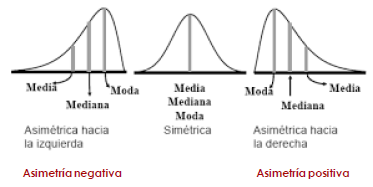

El factor de asimetría (skewness) puede ser calculado con el paquete Scipy de Python, o con .skew de Pandas (pd.DataFrame(datos).skew()).

Es importante tener en cuenta la simetría de la distribución de nuestros datos ya que muchos métodos estadísticos y algoritmos de aprendizaje automático que podamos utilizar estan desarrollados para distribuciones de tipo normal. Por tanto, conviene chequear su simetría.

**Ejercicio**: Vamos a comparar la distribución normal con la distribución gamma. La distribución gamma esta caracterizada por los parámetros de forma y escala. Haciendo uso de numpy.random.normal y numpy.random.gamma crea las siguientes distribuciones con 10000 valores:
1. Una distribución normal con mu = 5 y std = 2
2. Una distribución gamma con factor de forma = 2.5 y escala = 2
3. Una distribución gamma con factor de forma = 5 y escala = 3

**a)** Usa plot.hist para mostrar sus histogramas. Deja las cajas transparentes para que podamos ver las tres (histtype = 'step'). Usa bins definidos por un array numpy de -5 a 55, equiespaciados 0.2. Recuerda escribir las etiquetas (labels) y los nombres de los ejes.

**b)** Una vez lista la gráfica, como puedo hacer zoom en los dos picos mas altos? Usa xlim e ylim.

**c)** Dibuja el histograma de la distribución gamma 1 del ejercicio a, y usa un plot lineall para marcar su media, moda y mediana.

**d)** Crea un dataframe con la media, mediana y la asimetría (skew) para las tres distribuciones.

**e)** Crea un diagrama de cajas con las tres distribuciones. Recuerda utilizar las etiquetas (labels). Que diferencias observas? Prescinde de los outliers para verlo mas claramente.






In [6]:
# Ejercicio a y b)


In [7]:
# Ejercicio c)



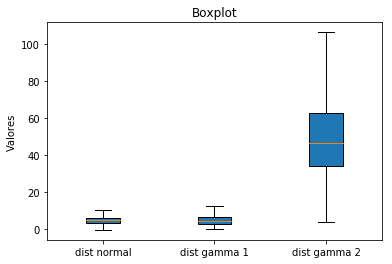

In [180]:
# Ejercicio d)

lista_datos = [datos, datos_G1, datos_G2]

# Creamos un diagrama de caja
plt.boxplot(lista_datos, labels = ['dist normal', 'dist gamma 1', 'dist gamma 2'], showfliers = False, patch_artist=True)
plt.ylabel('Valores') # Nombre del eje vertical
plt.title('Boxplot') # Título de la gráfica
plt.show()

In [203]:
# Ejercicio d) 


mi_dict = {'Mediana': [np.median(datos), np.median(datos_G1), np.median(datos_G2)],
           'Media': [np.mean(datos), np.mean(datos_G1), np.mean(datos_G2)],
          'Skew': [pd.DataFrame(datos).skew()[0],pd.DataFrame(datos_G1).skew()[0],pd.DataFrame(datos_G2).skew()[0]]}

pd.DataFrame(mi_dict)

,Mediana,Media,Skew
0,5.031104,5.032249,-0.010632
1,4.333008,4.982409,1.322936
2,14.112548,15.063549,0.903943
